# Regressão Linear - Bolsa De Valores Americana

## Com Split de Dados - Versão 02

### fonte de dados: https://finance.yahoo.com/
### https://finance.yahoo.com/screener/predefined/most_actives

### Nome: Vladimir Alencar, Matricula:

In [1]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://finance.yahoo.com/screener/predefined/most_actives
# açoes da Facebook
fb = pd.read_csv("fb.csv").set_index("Date")

fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [3]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-13,158.740005,159.779999,158.419998,159.259995,159.259995,13929200
2017-07-14,160.130005,160.320007,159.330002,159.970001,159.970001,16371200
2017-07-17,160.250000,160.779999,158.809998,159.729996,159.729996,12858800
2017-07-18,159.660004,163.729996,159.419998,162.860001,162.860001,23722900
2017-07-19,163.589996,165.699997,163.169998,164.139999,164.139999,26007000


In [4]:
print("Numero de Registros ou Tuplas: ", len(fb))

Numero de Registros ou Tuplas:  1300


In [ ]:
1300/330

In [5]:
# converte o index para o tipo data
fb.index = pd.to_datetime(fb.index)
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [6]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2012-05-18 to 2017-07-19
Data columns (total 6 columns):
Open         1300 non-null float64
High         1300 non-null float64
Low          1300 non-null float64
Close        1300 non-null float64
Adj Close    1300 non-null float64
Volume       1300 non-null int64
dtypes: float64(5), int64(1)
memory usage: 71.1 KB


In [7]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03
mean,78.058762,78.883938,77.176454,78.063777,78.063777,3.938419e+07
std,39.250163,39.436006,39.056692,39.301331,39.301331,3.325543e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,42.042499,43.887498,41.704999,42.349998,42.349998,1.981218e+07
50%,77.134998,77.974998,76.075001,77.205002,77.205002,2.952915e+07
75%,111.852503,112.849996,110.595003,112.212500,112.212500,4.819220e+07
max,163.589996,165.699997,163.169998,164.139999,164.139999,5.735764e+08


In [8]:
# Preparacao do modelo e aplicacao da regressao
olm = lm.LinearRegression()
X = numpy.array([x.toordinal() for x in fb.index])[:, numpy.newaxis]
y = fb['Close']

print(y[:5])

Date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
Name: Close, dtype: float64


In [9]:
#aplicacao do modelo de regressao
olm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# aplicando a predicao - datas
yp = [olm.predict(x.toordinal())[0] for x in fb.index]

# Avaliacao do modelo
olm_score = olm.score(X, y)
print(olm_score)

0.970454845955


## a reta de regressao

In [11]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.07106220816292406 * x + -52194.320972956884


Reta de Regressão: y = 0.07106220816292406 * x + -52194.320972956884


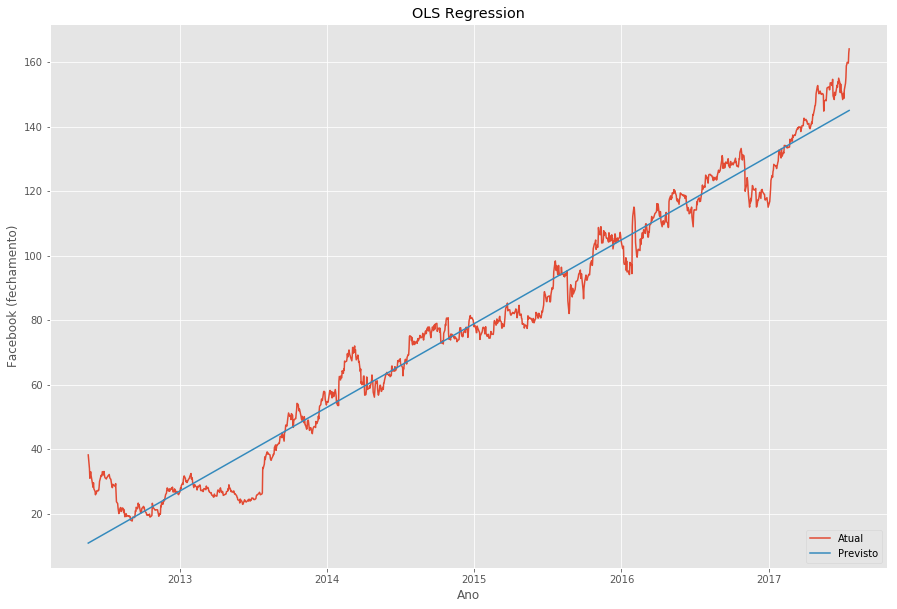

In [12]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, yp)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")

print('Reta de Regressão: y = {0} * x + {1}'.format(a, b))
plt.show()

## previsao para o ano de 2018

In [13]:
from datetime import datetime

data = "2018-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2018 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2018[0])

previsao para  2018-01-30  (fechamento) = us$  158.913273665


In [14]:
data = "2020-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2020 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2020[0])

previsao para  2020-01-30  (fechamento) = us$  210.788685624


In [15]:
data = "2025-01-30"
datetime_object = datetime.strptime(data, '%Y-%m-%d')


yp2025 = olm.predict(datetime_object.toordinal())
print ("previsao para ", data, " (fechamento) = us$ ", yp2025[0])

previsao para  2025-01-30  (fechamento) = us$  340.619339938


In [16]:
lucro = yp2025[0] / yp2018[0] * 100
print("diferenca ano 2025 - 2018 - Lucro da ação do Facebook (%) ->", "{:3.0f}%".format(lucro)  )

diferenca ano 2025 - 2018 - Lucro da ação do Facebook (%) -> 214%


# Regressão Linear - Usando conjuntos de treino/teste 

## Split aleatório de treino e teste

In [17]:
from IPython.display import Image
Image(url = 'images/split-de-dados-machine-learning.png')

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).
Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [18]:
from sklearn import model_selection
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

Y = y
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criação do modelo
modelo = lm.LinearRegression()
modelo.fit(X_treino, Y_treino)

# Score
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))
print (result)

Acurácia: 97.003%
0.970028962162


In [ ]:
# aplicando a predicao - datas
olm = modelo
yp = [olm.predict(x.toordinal())[0] for x in fb.index]

## a reta de regressao

In [19]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.07106220816292406 * x + -52194.320972956884


Reta de Regressão Linear: y = 0.07106220816292406 * x + -52194.320972956884


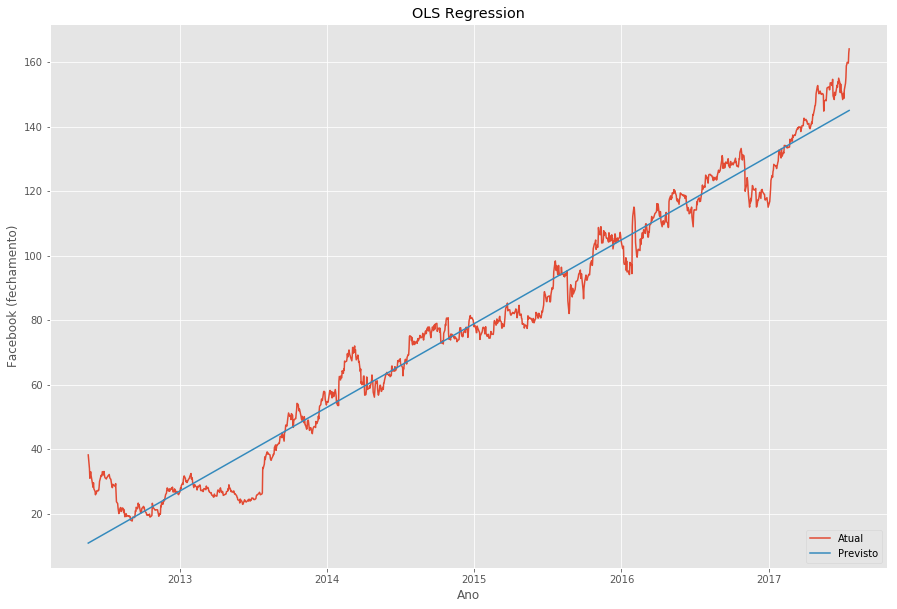

In [20]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, yp)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")

print('Reta de Regressão Linear: y = {0} * x + {1}'.format(a, b))

plt.show()

# Usando Validação Cruzada para treinar o modelo

In [1]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão (Eu disse que Estatística era importante no processo de Big Data Analytics). O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [22]:
# Definindo os valores para os folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

Y = y
# Criando o modelo
modelo = lm.LinearRegression()
modelo.fit(X,Y)
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia: %.3f%% (%.3f%%)" % (resultado.mean()*100.0, resultado.std() * 100.0))
print(resultado.mean())

Acurácia: 97.014% (0.367%)
0.970141536647


In [ ]:
# aplicando a predicao - datas
olm = modelo
yp = [olm.predict(x.toordinal())[0] for x in fb.index]

## a reta de regressao

In [23]:
a = olm.coef_[0]
b = olm.intercept_
print("Modelo Cros-Validatinon")
print(' y = {0} * x + {1}'.format(a, b))

Modelo Cros-Validatinon
 y = 0.07106220816292406 * x + -52194.320972956884


In [24]:
print("Modelo de Split: ")
print(" y = 0.07118755997540646 * x + -52286.73808925971")

Modelo de Split: 
 y = 0.07118755997540646 * x + -52286.73808925971


Reta de Regressão: y = 0.07106220816292406 * x + -52194.320972956884


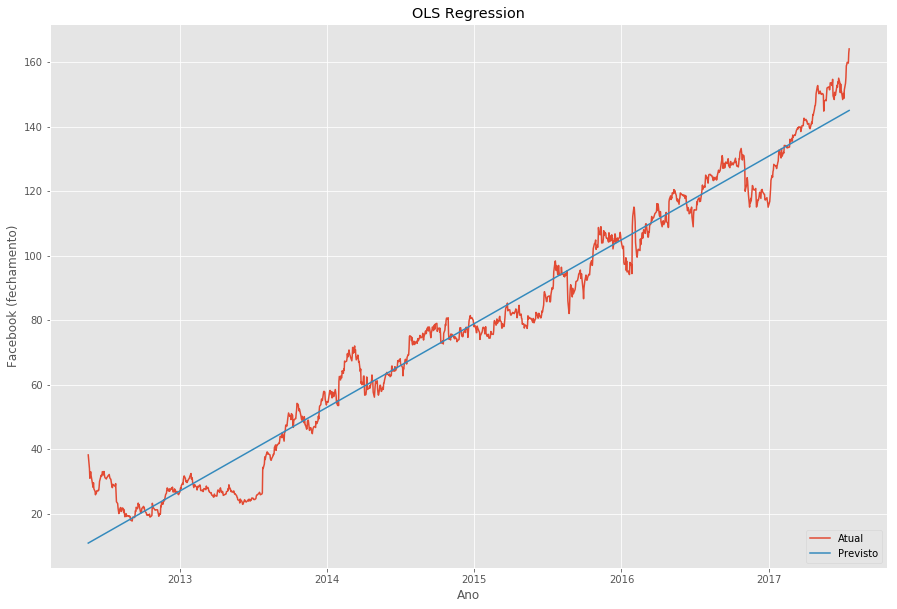

In [25]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, yp)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")

print('Reta de Regressão: y = {0} * x + {1}'.format(a, b))
plt.show()

In [ ]:
# Plot do modelo
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot o Y e o YPrevisto - datas
plt.plot(fb.index, y)
plt.plot(fb.index, yp)

# adcionando textos
plt.title("OLS Regression")
plt.xlabel("Ano")
plt.ylabel("Facebook (fechamento)")
plt.legend(["Atual", "Previsto"], loc="lower right")
plt.savefig("fabebook-linregr.pdf")


plt.show()